In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Martín Calvo


# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



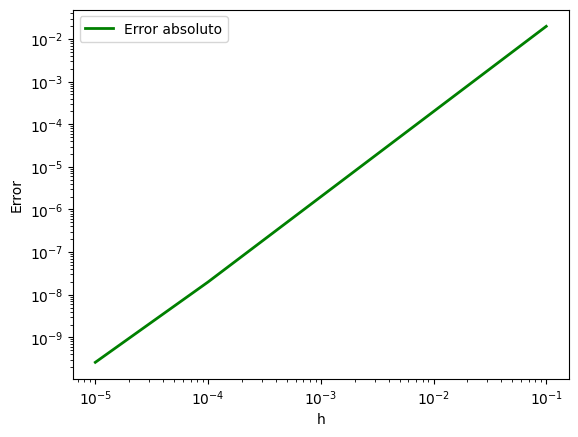

La h necesaria para la tolerancia pedida es 1.0e-05, el valor final de la derivada es 9.88751
El valor real de f'(2) es 9.88751, el error absoluto comparando el valor obtenido y el real es 2.59e-10


In [21]:
 # Se compara con ella misma, entonces la tolerancia se obtiene al comparar con la última iteración
f=lambda x: 3**x

def derivada(f,x, tol = 1e-8):
  '''
  Devuelve la derivada en un punto x (o puntos en el caso de un array) y la h óptima para la tolerancia solicitada
  f: función calleable que se pretende derivar
  x: float o array que se va a evaluar
  tol: tolerancia solicitada, el error que se acepta de la derivada respecto a su última iteración
  '''
  h=0.1
  valor_derivada=0
  valor_anterior=1
  ache=[]
  dos=[]
  while abs(valor_derivada-valor_anterior)>tol:

    hanterior=h
    h*=0.1
    valor_derivada=(f(x+h)-f(x-h))/(2*h)
    valor_anterior=(f(x+hanterior)-f(x-hanterior))/(2*hanterior)
    dos.append(valor_anterior) #Se mete el valor de 2 a la lista
    ache.append(hanterior) #h anterior realmente es la h actual, por eso es la que se mete a la lista

  return np.array(dos),np.array(ache)

listavalores=derivada(f,2)[0]
listah=derivada(f,2)[1]

valorfinal=derivada(f,2)[0][-1]
hfinal=derivada(f,2)[1][-1]

real=(3**2)*(np.log(3))

error=abs(listavalores-real)

plt.loglog(listah,error, color="green", linewidth=2, label="Error absoluto")
plt.ylabel("Error")
plt.xlabel("h")
plt.legend()
plt.show()

print(f"La h necesaria para la tolerancia pedida es {hfinal:.1e}, el valor final de la derivada es {valorfinal:.5f}")
print(f"El valor real de f'(2) es {real:.5f}, el error absoluto comparando el valor obtenido y el real es {error[-1]:.2e}")

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



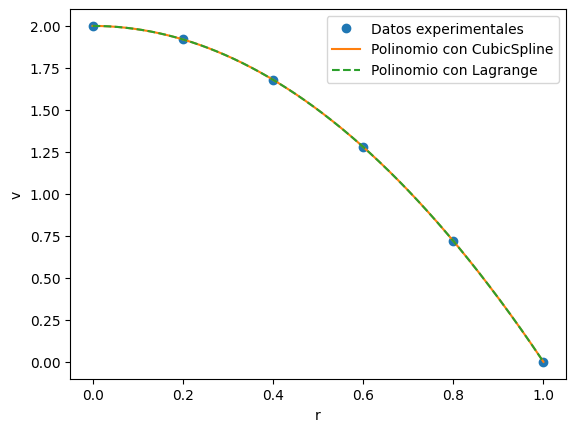

La derivada dv/dr cuando r = 0.0 es aproximadamente -0.0002
La derivada dv/dr cuando r = 0.2 es aproximadamente -0.0004
La derivada dv/dr cuando r = 0.4 es aproximadamente -0.0008
La derivada dv/dr cuando r = 0.6 es aproximadamente -0.0012
La derivada dv/dr cuando r = 0.8 es aproximadamente -0.0016
La derivada dv/dr cuando r = 1.0 es aproximadamente -0.0020


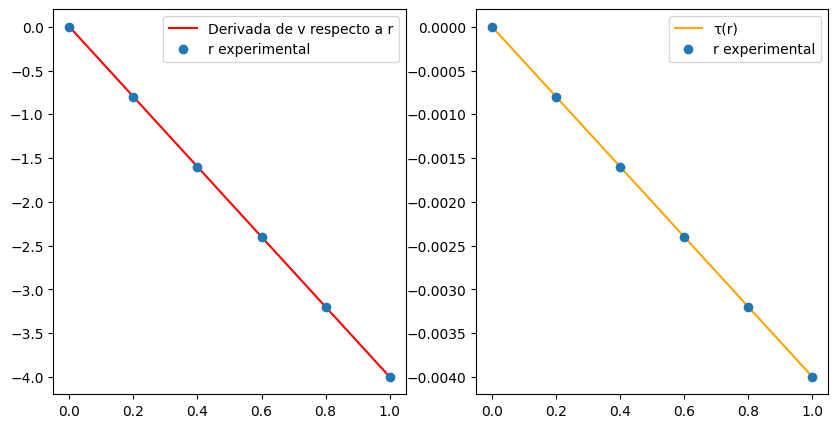

El esfuerzo cortante del fluido cuando r = 0.0 es aproximadamente -0.0000002
El esfuerzo cortante del fluido cuando r = 0.2 es aproximadamente -0.0008000
El esfuerzo cortante del fluido cuando r = 0.4 es aproximadamente -0.0016000
El esfuerzo cortante del fluido cuando r = 0.6 es aproximadamente -0.0024000
El esfuerzo cortante del fluido cuando r = 0.8 es aproximadamente -0.0032000
El esfuerzo cortante del fluido cuando r = 1.0 es aproximadamente -0.0039991


In [13]:
mu=0.001
r=np.array([0,0.2,0.4,0.6,0.8,1])
v=np.array([2,1.92,1.68,1.28,0.72,0])  #datos brindados

polcs_v=CubicSpline(r,v)
pollg_v=lagrange(r,v)

erre=np.arange(0,1,1e-4) #Un arange de r con el espacio h que piden
ve=polcs_v(erre)

plt.plot(r,v,"o", label="Datos experimentales")
plt.plot(erre,polcs_v(erre), label="Polinomio con CubicSpline")
plt.plot(erre,pollg_v(erre),linestyle="--", label="Polinomio con Lagrange")
plt.xlabel("r")
plt.ylabel("v")
plt.legend()
plt.show()

dvdr_array=np.gradient(ve,erre)  #La h está implícita en el arange que hice de la variable independiente
dvdr_func=CubicSpline(erre,dvdr_array)  #La hice como array y como función

for i in range(len(r)):
  print(f"La derivada dv/dr cuando r = {r[i]} es aproximadamente {dvdr_array[i]:.4f}")  #Imprimí un par de valores para que se viera algo numérico aparte de la funcción

fig,ax=plt.subplots(1,2, figsize=(10,5))
ax[0].plot(erre, dvdr_func(erre),label="Derivada de v respecto a r", color="red")
ax[0].plot(r,dvdr_func(r),"o",label="r experimental")
ax[0].legend()


tao=lambda r:mu*dvdr_func(r)
ax[1].plot(erre,tao(erre), color="orange",label="τ(r)")
ax[1].plot(r,tao(r),"o",label="r experimental")
ax[1].legend()
plt.show()

for i in range(len(r)):
  print(f"El esfuerzo cortante del fluido cuando r = {r[i]} es aproximadamente {tao(r[i]):.7f}")

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [4]:
def rho(z,y,x):
  return x*y*z  #Función de la densidad


def integral_z(y,x):
  integrando=lambda z:x*y*z  #x, y son constantes y se integra respecto a z
  return quad(integrando,0,1-x-y)[0]

def integral_y(x):
  integrando=lambda y:integral_z(y,x)  #x es constante y se integra respecto a y
  return quad(integrando,0,1-x)[0]

integral_quad=quad(integral_y,0,1)[0] #Se integra respecto a x


zup=lambda x,y:1-x-y  #Los límites de integración son los mismos para las 3 integrales
zdown=0
yup=lambda x:1-x
ydown=0
xup=1
xdown=0

integral_tplquad=tplquad(rho,xdown,xup,ydown,yup,zdown,zup)[0]

print(f"La integral paso a paso con quad vale {integral_quad:.6f}, la integral calculada con tplquad es {integral_tplquad:.6f}")


La integral paso a paso con quad vale 0.001389, la integral calculada con tplquad es 0.001389


In [5]:
densidad=integral_tplquad
def Iz(z,y,x):
  return densidad*(x**2+y**2) #Función del momento de inercia en z

def integral2_z(y,x):
  integrando=lambda z:densidad*(x**2+y**2)
  return quad(integrando,0,1-x-y)[0]

def integral2_y(x):
  integrando=lambda y:integral2_z(y,x)
  return quad(integrando,0,1-x)[0]

integral2_quad=quad(integral2_y,0,1)[0]
integral2_tplquad=tplquad(Iz,xdown,xup,ydown,yup,zdown,zup)[0]

print(f"La integral paso a paso con quad vale {integral2_quad:.3e}, la integral calculada con tplquad es {integral2_tplquad:.3e}")  #Son iguales las distribuciones de la masa en ambos ejes

La integral paso a paso con quad vale 4.630e-05, la integral calculada con tplquad es 4.630e-05


In [6]:
densidad=integral_tplquad
def Ix(z,y,x):
  return densidad*(z**2+y**2) #Función del momento de inercia en x


def integral3_z(y,x):
  integrando=lambda z:densidad*(z**2+y**2)
  return quad(integrando,0,1-x-y)[0]

def integral3_y(x):
  integrando=lambda y:integral3_z(y,x)
  return quad(integrando,0,1-x)[0]

integral3_quad=quad(integral3_y,0,1)[0]
integral3_tplquad=tplquad(Ix,xdown,xup,ydown,yup,zdown,zup)[0]

print(f"La integral paso a paso con quad vale {integral3_quad:.3e}, la integral calculada con tplquad es {integral3_tplquad:.3e}")

La integral paso a paso con quad vale 4.630e-05, la integral calculada con tplquad es 4.630e-05
